#Classification Trees

Classification Trees are an exceptionally useful machine learning method when you need to to know how the decisions are being made. For example, if you have to justify the predictions to your boss, Classification Trees are a good method because each step in the decision making process is easy to understand.

we will use scikit-learn and Cost Complexity Pruning to build a Classification Tree, which uses continuous and categorical data from the
UCI Machine Learning Repository
 to predict whether or not a patient has
heart disease


## 1. Import the modules

In [2]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import matplotlib.pyplot as plt # drawing graphs
from sklearn.tree import DecisionTreeClassifier # a classification tree
from sklearn.tree import plot_tree # draw a classification tree
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # import ConfusionMatrixDisplay instead of plot_confusion_matrix

## 2. Import the data

In [4]:
df = pd.read_csv("processed.cleveland.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We see that instead of nice column names, we just have column numbers. Since nice column names would make it easier to know how to format the data, let's replace the column numbers with the following column names:

**age**,

**sex**,

**cp** - chest pain

**restbp** - resting blood pressure (in mm Hg)

**chol** - serum cholesterol in mg/dl

**fbs** - fasting blood sugar

**restecg** - resting electrocardiographic results

**thalach** - maximum heart rate achieved

**exang** - exercise induced angina

**oldpeak** - ST depression induced by exercise relative to rest

**slope** - the slope of the peak exercise ST segment.

**ca** - number of major vessels (0-3) colored by fluoroscopy

**thal** - this is short of thalium heart scan.

**hd** - diagnosis of heart disease, the predicted attribute

In [5]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


##3. Missing Data

In [6]:
# Task 3: Identifying missing data
print("\nColumn data types:")
print(df.dtypes)

# Investigating unique values in columns 'ca' and 'thal'
print("\nUnique values in 'ca' column:")
print(df['ca'].unique())

print("\nUnique values in 'thal' column:")
print(df['thal'].unique())


Column data types:
age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

Unique values in 'ca' column:
['0.0' '3.0' '2.0' '1.0' '?']

Unique values in 'thal' column:
['6.0' '3.0' '7.0' '?']


##4. Dealing with Missing Data

So 6 of the 303 rows, or 2%, contain missing values. Since 303 - 6 = 297, and 297 is plenty of data to build a classification tree, we will remove the rows with missing values, rather than try to impute their values. We do this by selecting all of the rows that do not contain question marks in either the ca or thal columns:

In [7]:
# Task 4: Dealing with missing data

# Find rows with missing data (question marks in 'ca' or 'thal')
missing_data_rows = df[(df['ca'] == '?') | (df['thal'] == '?')]
print(f"Rows with missing data: {len(missing_data_rows)}")
print(missing_data_rows)

# Count the number of rows in the full dataset
print(f"Total rows in dataset: {len(df)}")

# Remove rows with missing data
df_no_missing = df[(df['ca'] != '?') & (df['thal'] != '?')]

# Check if the number of rows is correct
print(f"Rows after removing missing data: {len(df_no_missing)}")

# Verify that the 'ca' column no longer contains question marks
print("\nUnique values in 'ca' column after cleaning:")
print(df_no_missing['ca'].unique())

# Verify that the 'thal' column no longer contains question marks
print("\nUnique values in 'thal' column after cleaning:")
print(df_no_missing['thal'].unique())

Rows with missing data: 6
      age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
87   53.0  0.0  3.0   128.0  216.0  0.0      2.0    115.0    0.0      0.0   
166  52.0  1.0  3.0   138.0  223.0  0.0      0.0    169.0    0.0      0.0   
192  43.0  1.0  4.0   132.0  247.0  1.0      2.0    143.0    1.0      0.1   
266  52.0  1.0  4.0   128.0  204.0  1.0      0.0    156.0    1.0      1.0   
287  58.0  1.0  2.0   125.0  220.0  0.0      0.0    144.0    0.0      0.4   
302  38.0  1.0  3.0   138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  hd  
87     1.0  0.0    ?   0  
166    1.0    ?  3.0   0  
192    2.0    ?  7.0   1  
266    2.0  0.0    ?   2  
287    2.0    ?  7.0   0  
302    1.0    ?  3.0   0  
Total rows in dataset: 303
Rows after removing missing data: 297

Unique values in 'ca' column after cleaning:
['0.0' '3.0' '2.0' '1.0']

Unique values in 'thal' column after cleaning:
['6.0' '3.0' '7.0']


##5. Splitting Data into Dependent and Independent Variables

We will use the conventional notation of X (capital X) to represent the columns of data that we will use to make classifications and y (lower case y) to represent the thing we want to predict. In this case, we want to predict hd (heart disease).

The reason we deal with missing data before splitting it into X and y is that if we remove rows, splitting after ensures that each row in X correctly corresponds with the appropriate value in y.



In [8]:
# Task 5: Splitting the data

# Split the data into X (independent variables) and y (dependent variable)
X = df_no_missing.drop('hd', axis=1).copy()  # Features
y = df_no_missing['hd'].copy()  # Target variable

# Display the shapes of X and y
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

Shape of X (features): (297, 13)
Shape of y (target): (297,)


##6. Format Data

**One-Hot Encoding for Categorical Variables**

In [9]:
# Perform one-hot encoding for categorical variables with more than 2 categories
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=False)

# Display the first few rows to verify the results
print("Preview of X after One-Hot Encoding:")
print(X_encoded.head())

Preview of X after One-Hot Encoding:
    age  sex  restbp   chol  fbs  thalach  exang  oldpeak   ca  cp_1.0  ...  \
0  63.0  1.0   145.0  233.0  1.0    150.0    0.0      2.3  0.0    True  ...   
1  67.0  1.0   160.0  286.0  0.0    108.0    1.0      1.5  3.0   False  ...   
2  67.0  1.0   120.0  229.0  0.0    129.0    1.0      2.6  2.0   False  ...   
3  37.0  1.0   130.0  250.0  0.0    187.0    0.0      3.5  0.0   False  ...   
4  41.0  0.0   130.0  204.0  0.0    172.0    0.0      1.4  0.0   False  ...   

   cp_4.0  restecg_0.0  restecg_1.0  restecg_2.0  slope_1.0  slope_2.0  \
0   False        False        False         True      False      False   
1    True        False        False         True      False       True   
2    True        False        False         True      False       True   
3   False         True        False        False      False      False   
4   False        False        False         True       True      False   

   slope_3.0  thal_3.0  thal_6.0  thal_7.0 

get_dummies() puts all of the columns it does not process in the front and it puts cp at the end. It also split cp into 4 columns, just like we expected it. cp_1.0 is 1 for any patient that scored a 1 for chest pain and 0 for all other patients. cp_2.0 is 1 for any patient that scored 2 for chest pain and 0 for all other patients. cp_3.0 is 1 for any patient that scored 3 for chest pain and cp_4.0 is 1 for any patient that scored 4 for chest pain.

**Handle Binary Categorical Variables**

In [10]:
# Verify that binary categorical columns contain only 0s and 1s
binary_columns = ['sex', 'fbs', 'exang']
for col in binary_columns:
    print(f"Unique values in '{col}': {X_encoded[col].unique()}")

Unique values in 'sex': [1. 0.]
Unique values in 'fbs': [1. 0.]
Unique values in 'exang': [0. 1.]


Since these binary variables (sex, fbs, exang) already contain 0s and 1s, no further changes are needed for these columns.

**Convert y to Binary Classification**

y doesn't just contain 0s and 1s. Instead, it has 5 different levels of heart disease. 0 = no heart disease and 1-4 are various degrees of heart disease. We can see this with unique()

Since we're only making a tree that does simple classification and only care if someone has heart disease or not, we need to convert all numbers > 0 to 1.

In [11]:
# Convert `y` to binary (0: no heart disease, 1: has heart disease)
y_binary = y.copy()
y_binary = y_binary.apply(lambda val: 1 if val > 0 else 0)

# Verify the unique values in the target variable
print("Unique values in `y_binary` (target variable):")
print(y_binary.unique())

Unique values in `y_binary` (target variable):
[0 1]


##7. Build A Preliminary Classification Tree


In [16]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binary, random_state=42)

In [17]:
# Initialize and train the Decision Tree Classifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Text(0.5, 1.0, 'Confusion Matrix for Classification Tree')

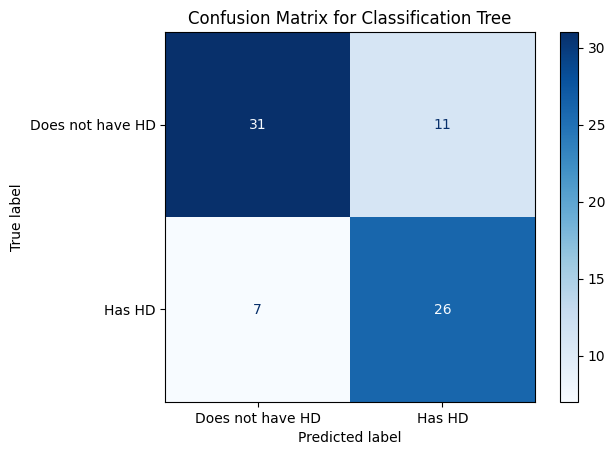

In [18]:
# Plot the Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(
    clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"], cmap="Blues"
)
disp.ax_.set_title("Confusion Matrix for Classification Tree")

In the confusion matrix, we see that of the 31 + 11 = 42 people that did not have Heart Disease, 31 (73.81%) were correctly classified.
Of the 7 + 26 = 33 people that have Heart Disease, 26 (78.79%) were correctly classified.

Can we do better? One thing that might be holding this Classification Tree back is that it may have overfit the training dataset. So, let’s prune the tree. Pruning, in theory, should solve the overfitting problem and give us better results.

##9. Cost Complexity Pruning Part 2: Cross Validation For Finding the Best Alpha
The graphs we just drew suggest one value for alpha, 0.016, but another set of data might suggest another optimal value.

First, let's demonstrate that different training and testing datasets result in trees with different accuracies:

**Extracting ccp_alphas**

In [19]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

**Building Pruned Trees**

In [20]:
clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

**Calculating Test and Training accuracies**

In [21]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

**Plotting the results**

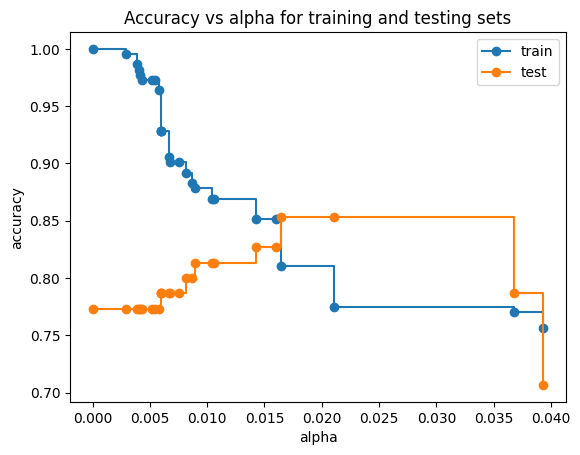

In [22]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

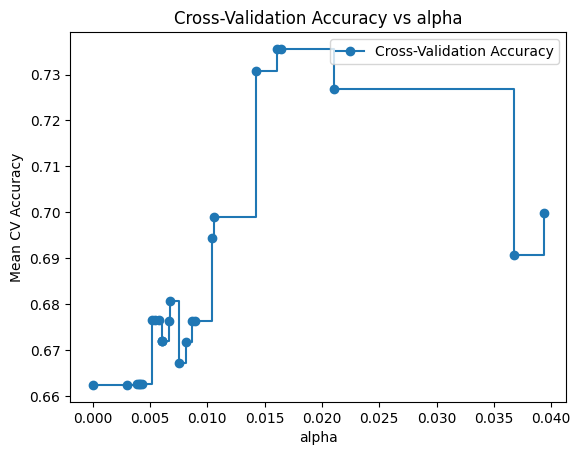

In [23]:
# Perform 10-Fold Cross Validation
alpha_scores = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10, scoring='accuracy')
    alpha_scores.append(np.mean(scores))

# Plot Cross-Validation Accuracy
plt.figure()
plt.plot(ccp_alphas, alpha_scores, marker='o', label='Cross-Validation Accuracy', drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("Mean CV Accuracy")
plt.title("Cross-Validation Accuracy vs alpha")
plt.legend()
plt.show()

Using cross validation, we can see that, over all, instead of setting ccp_alpha=0.016, we need to set it to something closer to 0.014

In [26]:
ideal_ccp_alpha = ccp_alphas[np.argmax(alpha_scores)]

##10. Building, Evaluating, Drawing, and Interpreting the Final Classification Tree

Now that we have the ideal value for alpha we can build the final Classification Tree by setting ccp_alpha:

In [27]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

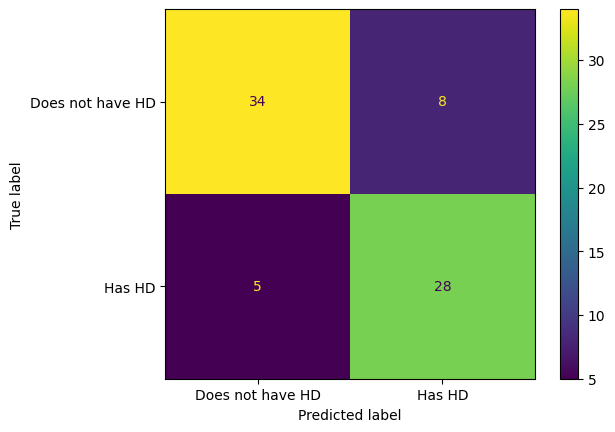

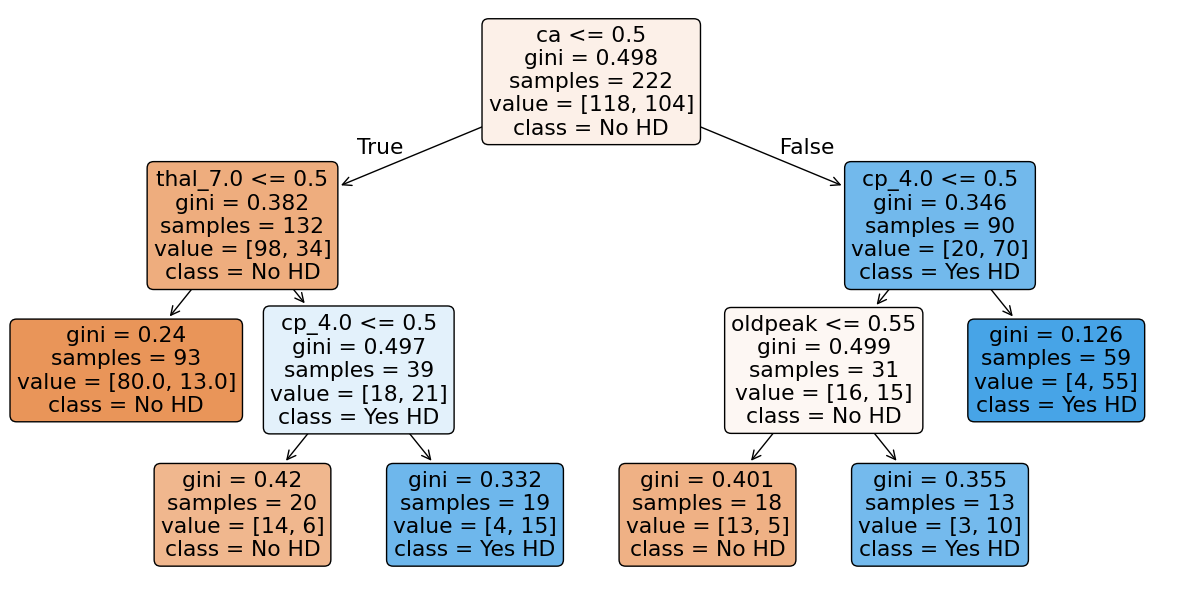

In [35]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, clf_dt_pruned.predict(X_test))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Does not have HD", "Has HD"])
disp.plot()
plt.show()  # Display the confusion matrix plot

# Get the feature names actually used by the pruned tree (use feature_names_in_ if preprocessing was applied)
used_feature_names = clf_dt_pruned.feature_names_in_

# If you're not using preprocessing, ensure you're using the correct feature names from X_train
# used_feature_names = [
#     X_train.columns[i] for i in clf_dt_pruned.tree_.feature if i != -2 and i < len(X_train.columns)
# ]

# Plot the pruned decision tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=used_feature_names)  # Using used_feature_names here
plt.show()  # Display the decision tree plot

Now let's discuss how to interpret the tree.
In each node, we have:
- The variable (column name) and the threshold for splitting the observations. For example, in the tree's root, we use **ca** to split the observations. All
observations with **ca <= 0.5** go to the **left** and all observations with **ca > 0.5** go to the **right**.
- **gini** is the gini index or score for that node
- **samples** tell us how many samples are in that node
- **value** tells us how many samples in the node are in each category. In this example, we have two categories, **No** and **Yes**, referring to whether or not a patient has heart disease. The number of patients with **No** comes first because the categories are in alphabetical order. Thus, in the root, 118 patients have **No** and 104 patients have **Yes**.
- **class** tells us whichever category is represented most in the node. In the root, since 118 people have **No** and only 104 people have **Yes**, class is set to **No**.

The leaves are just like the nodes, except that they do not contain a variable and threshold for splitting the observations.

The nodes and leaves are colored by the **class**. In this case **No** is different shades of orange-ish and **Yes** is different shades of blue. The the darker the shade, the lower the **gini** score, and that tells us how much the node or leaf is skewed towards one class.